Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Jacob Ravenberg"
COLLABORATORS = ""

---

# System Response 2022

In [2]:
from matplotlib import pyplot as plt
import numpy as np

The following function does not need to be completed.  You are welcome to complete it and use it to check your work in the plots below.  You will not be graded on this code.  If you don't want to use this, just have it return zeros or something so the code below won't break.

In [3]:
def fourier_series(D_n, omega_0, t):
    """Calculates the Fourier series of a periodic function with a given set of
    Fourier coefficients D_n, angular frequency omega, and time t.

    Parameters
    ----------
    D_n : ndarray
        An array of Fourier coefficients from -N <= n <= N
    omega_0 : float
        The angular frequency of the periodic function
    t : ndarray
        An array of time values

    Returns
    -------
    ndarray
        An array of function values at each time value.
    """
    # Number of harmonics N (assuming D_n has length 2N + 1)
    N = (len(D_n) - 1) // 2

    # Create an array of n values from -N to N
    n_vals = np.arange(-N, N + 1)

    # Ensure t is a NumPy array for vectorized operations
    t = np.asarray(t)

    # Initialize the output array with zeros (complex numbers)
    f_t = np.zeros_like(t, dtype=np.complex128)

    # Compute the exponential term for each n and t
    # This creates a 2D array where each row corresponds to a time value,
    # and each column corresponds to an n value.
    exponentials = np.exp(1j * np.outer(n_vals, omega_0 * t))

    # Multiply each exponential by its corresponding D_n
    # D_n is reshaped to (len(D_n), 1) to align with exponentials
    terms = D_n[:, np.newaxis] * exponentials

    # Sum over all n to get the Fourier series values at each time t
    f_t = np.sum(terms, axis=0)

    # Since the original function is real-valued, take the real part
    f_t_real = f_t.real

    return f_t_real

Determine the period and fundamental frequency $\omega_0$ for the function $f(t)$ seen below.

<img src="system_response2022a.png" width="400"/>  

Represent your answer as `omega_0 = XX`.

In [4]:
omega_0 = 2*np.pi / 4

In [5]:
assert isinstance(omega_0, float)

### BEGIN HIIDDEN TESTS
assert np.isclose(omega_0, np.pi / 2)

Derive the complex exponential Fourier series for $f(t)$.  Report your values of $D_n$ as a function `D(n)`.

In [6]:
def D(n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return 0
    else:
        return (2/(np.pi*n))*(-1)**((n-1)/2)

Let's check to see if this matches the original $f(t)$ using $N=50$.

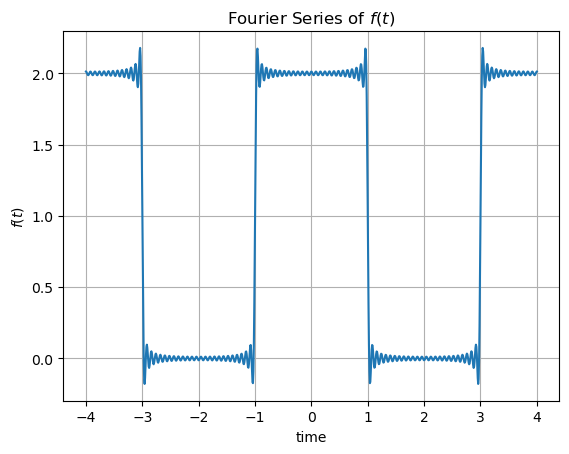

In [7]:
assert isinstance(D(1), (float, complex))

D_n = np.array([D(n) for n in range(-50, 51)])

t = np.linspace(-4, 4, 1000)
f_t = fourier_series(D_n, omega_0, t).real

plt.figure()
plt.plot(t, f_t, label="f(t)")
plt.xlabel("time")
plt.ylabel("$f(t)$")
plt.title("Fourier Series of $f(t)$")
plt.grid()



Derive the transfer function $H(s)$ for the circuit seen below.  

<img src="system_response2022b.png" width="400"/>  

Represent your answer as a function `H(s)`.

In [ ]:
def H(s):
    return s/(5+s)

In [ ]:
assert isinstance(H(1), float)



Given the input $f(t)$ for the circuit above, what is the output $y(t)$?

Represent your answer as a function `y(t)`.  Make sure that in your summation you are only summing terms $-50 \leq n \leq 50$.

In [8]:
def y(t):
    return np.where( t >= 0.0, ((5/3)*np.exp(-5*t)) - ((2/3)*np.exp(-2*t)), 0.0)

Let's visualize this result and see if it makes sense.  Does this behavior make sense intuitively if a square wave goes into a $RL$ circuit?

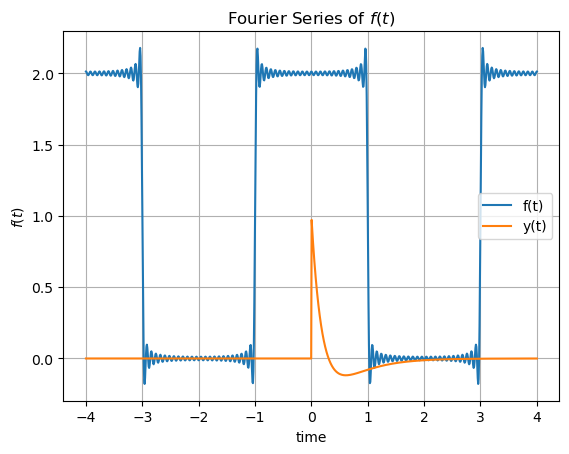

In [9]:
assert isinstance(D(1), (float, complex))


t = np.linspace(-4, 4, 1000)
y_t = y(t).real

plt.figure()
plt.plot(t, f_t, label="f(t)")
plt.plot(t, y_t, label="y(t)")
plt.xlabel("time")
plt.ylabel("$f(t)$")
plt.title("Fourier Series of $f(t)$")
plt.legend()
plt.grid()

